In [1]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import norm 

pd.set_option('display.max_columns', 50)

In [2]:
# read in the cleaned csv dataset 
sf_df = pd.read_csv("./Building_Permits_Clean.csv")


In [3]:
sf_df

,Unnamed: 0,Permit Type,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Current Status,Current Status Date,Filed Date,Issued Date,First Construction Document Date,Number of Existing Stories,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Plansets,Existing Construction Type,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode
0,0,4,05/06/2015,0326,023,140,Ellis,St,expired,12/21/2017,05/06/2015,11/09/2015,11/09/2015,6.0,11/03/2016,4000.00,4000.00,tourist hotel/motel,143.0,2.0,3.0,3.0,Tenderloin,94102.0
1,1,4,04/19/2016,0306,007,440,Geary,St,issued,08/03/2017,04/19/2016,08/03/2017,08/03/2017,7.0,12/03/2017,1.00,500.00,tourist hotel/motel,1.0,2.0,3.0,3.0,Tenderloin,94102.0
2,3,8,11/07/2016,0156,011,1230,Pacific,Av,complete,07/24/2017,11/07/2016,07/18/2017,07/18/2017,2.0,07/13/2018,2000.00,2000.00,1 family dwelling,1.0,2.0,5.0,3.0,Nob Hill,94109.0
3,4,6,11/28/2016,0342,001,950,Market,St,issued,12/01/2017,11/28/2016,12/01/2017,11/20/2017,3.0,12/01/2018,100000.00,100000.00,retail sales,1.0,2.0,3.0,6.0,Tenderloin,94102.0
4,5,8,06/14/2017,4105,009,800,Indiana,St,issued,07/06/2017,06/14/2017,07/06/2017,07/06/2017,5.0,07/01/2018,4000.00,4000.00,apartments,326.0,2.0,1.0,10.0,Potrero Hill,94107.0
5,6,8,06/30/2017,1739,020,1291,11th,Av,complete,07/12/2017,06/30/2017,06/30/2017,06/30/2017,3.0,06/25/2018,12000.00,12000.00,apartments,5.0,0.0,5.0,5.0,Inner Sunset,94122.0
6,24,8,08/08/2017,0542,039,1,Charlton,Ct,issued,08/08/2017,08/08/2017,08/08/2017,08/08/2017,4.0,08/08/2018,64650.00,64650.00,apartments,9.0,0.0,5.0,2.0,Marina,94123.0
7,25,8,08/16/2017,1824,006,1435,29th,Av,issued,08/16/2017,08/16/2017,08/16/2017,08/16/2017,2.0,02/16/2018,7000.00,7000.00,1 family dwelling,1.0,0.0,5.0,4.0,Sunset/Parkside,94122.0
8,48,8,10/11/2017,5934,020,938,Felton,St,complete,10/31/2017,10/11/2017,10/11/2017,10/11/2017,2.0,04/11/2018,14000.00,14000.00,1 family dwelling,1.0,0.0,5.0,9.0,Portola,94134.0
9,68,8,11/27/2017,1744,039,1241,06th,Av,issued,11/27/2017,11/27/2017,11/27/2017,11/27/2017,2.0,05/27/2018,6000.00,6000.00,apartments,3.0,0.0,5.0,5.0,Inner Sunset,94122.0


In [5]:
#Split the data fields

date_columns = [
    'Permit Creation Date',
    'Current Status Date',
    'Filed Date',
    'Issued Date',
    'First Construction Document Date',
    'Permit Expiration Date'
]

def splitDates(column):
    name = column[0:-4]
    sf_df[name+'Year'] = sf_df[column].astype(str).str[-4:]
    sf_df[name+'Year'] = pd.to_numeric(sf_df[name+'Year'], errors='coerce')
    sf_df[name+'Day'] = sf_df[column].astype(str).str[3:5]
    sf_df[name+'Day'] = pd.to_numeric(sf_df[name+'Day'], errors='coerce')
    sf_df[name+'Month'] = sf_df[column].astype(str).str[0:2]
    sf_df[name+'Month'] = pd.to_numeric(sf_df[name+'Month'], errors='coerce')
    
for column in date_columns:
    splitDates(column)
    #sf_df.drop(column)
 

In [6]:
sf_df.sample(5)

,Unnamed: 0,Permit Type,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Current Status,Current Status Date,Filed Date,Issued Date,First Construction Document Date,Number of Existing Stories,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Plansets,Existing Construction Type,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Permit Creation Year,Permit Creation Day,Permit Creation Month,Current Status Year,Current Status Day,Current Status Month,Filed Year,Filed Day,Filed Month,Issued Year,Issued Day,Issued Month,First Construction Document Year,First Construction Document Day,First Construction Document Month,Permit Expiration Year,Permit Expiration Day,Permit Expiration Month
112930,153169,8,03/28/2017,0213,015,1200,Taylor,St,issued,03/28/2017,03/28/2017,03/28/2017,03/28/2017,4.0,03/23/2018,3000.0,12000.0,apartments,16.0,0.0,5.0,3.0,Nob Hill,94108.0,2017,28,3,2017,28,3,2017,28,3,2017,28,3,2017,28,3,2018,23,3
10115,13365,8,05/22/2013,4791,013,1383,Shafter,Av,complete,07/23/2013,05/22/2013,05/28/2013,05/28/2013,3.0,05/23/2014,4000.0,4000.0,1 family dwelling,1.0,2.0,5.0,10.0,Bayview Hunters Point,94124.0,2013,22,5,2013,23,7,2013,22,5,2013,28,5,2013,28,5,2014,23,5
37441,48733,4,05/21/2014,3735,014,680,Folsom,St,complete,02/19/2015,05/21/2014,06/03/2014,06/03/2014,15.0,05/29/2015,2500.0,2500.0,food/beverage hndlng,0.0,2.0,1.0,6.0,Financial District/South Beach,94105.0,2014,21,5,2015,19,2,2014,21,5,2014,3,6,2014,3,6,2015,29,5
42289,55060,8,07/17/2014,1018,006,422,Spruce,St,issued,07/17/2014,07/17/2014,07/17/2014,07/17/2014,3.0,07/12/2015,42958.0,42958.0,apartments,1.0,0.0,5.0,2.0,Presidio Heights,94118.0,2014,17,7,2014,17,7,2014,17,7,2014,17,7,2014,17,7,2015,12,7
40415,52574,3,06/25/2014,0631,006,2229,Steiner,St,complete,06/29/2017,06/25/2014,03/20/2015,03/20/2015,4.0,03/04/2018,350000.0,774000.0,apartments,3.0,2.0,5.0,2.0,Pacific Heights,94115.0,2014,25,6,2017,29,6,2014,25,6,2015,20,3,2015,20,3,2018,4,3


In [7]:
sf_df['Permit Creation Year'].value_counts()

2015    30067
2016    28232
2014    28086
2013    27304
2017    26920
2018     3184
2012       21
Name: Permit Creation Year, dtype: int64

In [8]:
sf_df['Current Status'].value_counts()

complete      94905
issued        45707
expired        1341
cancelled      1182
reinstated      446
suspend         175
revoked          49
approved          7
withdrawn         1
incomplete        1
Name: Current Status, dtype: int64

### B.2 Better target column

The column "Current Status" is not a good target column to predict due to the fact that there are too many status which could mean the same. So we are going to manually categorize these values.

As we can see, there are multiple versions to name the current status. 
There are two possibilites to express the status finished and even eight versions to show that it is not yet finished. 
That is a problem because there are actually several ways to express the same which makes it very hard to work with the data.

Therefore we have changed current status to an int value. 
 - 1 means status finished 
 - 0 means status not finished 

This is how we created a variable which is suitable for predictions. 
We have lost some accuracy which means that we can not differ exactly if it is expired or cancelled.
For differentiate the data more exactly we could have created one or two more variables with 2 and 3 as an int value but for this case the distinction between finished or not should be sufficient.
But it makes it possible to  work with the given data. 


In [9]:
permitted_status = [
    'complete',
    'approved'
]

withdrawn_status = [
    'issued',
    'expired',
    'cancelled',
    'reinstated',
    'suspend',
    'revoked',
    'incomplete',
    'withdrawn'
]



In [10]:
for status in permitted_status:
    sf_df['Current Status'].replace(to_replace=status, value='1', inplace=True)
    
for status in withdrawn_status:
    sf_df['Current Status'].replace(to_replace=status, value='0', inplace=True)

In [11]:
#Change data type
sf_df['Current Status'] = pd.to_numeric(sf_df['Current Status'])
sf_df['Current Status'].value_counts()

1    94912
0    48902
Name: Current Status, dtype: int64

In [12]:
sf_df.sample()

,Unnamed: 0,Permit Type,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Current Status,Current Status Date,Filed Date,Issued Date,First Construction Document Date,Number of Existing Stories,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Plansets,Existing Construction Type,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Permit Creation Year,Permit Creation Day,Permit Creation Month,Current Status Year,Current Status Day,Current Status Month,Filed Year,Filed Day,Filed Month,Issued Year,Issued Day,Issued Month,First Construction Document Year,First Construction Document Day,First Construction Document Month,Permit Expiration Year,Permit Expiration Day,Permit Expiration Month
44397,57817,8,08/13/2014,2765,023,4369,21st,St,0,06/24/2015,08/13/2014,06/24/2015,06/24/2015,2.0,06/08/2018,100000.0,130000.0,1 family dwelling,1.0,2.0,5.0,8.0,Noe Valley,94114.0,2014,13,8,2015,24,6,2014,13,8,2015,24,6,2015,24,6,2018,8,6


In [13]:
plt.rcParams['figure.figsize'] = [5, 5]
correlation_matrix = sf_df.corr().round(2)
#sns.heatmap(data=correlation_matrix, annot=True)
correlation_matrix.style.background_gradient(cmap='coolwarm')
#correlation_matrix

,Unnamed: 0,Permit Type,Street Number,Current Status,Number of Existing Stories,Estimated Cost,Revised Cost,Existing Units,Plansets,Existing Construction Type,Supervisor District,Zipcode,Permit Creation Year,Permit Creation Day,Permit Creation Month,Current Status Year,Current Status Day,Current Status Month,Filed Year,Filed Day,Filed Month,Issued Year,Issued Day,Issued Month,First Construction Document Year,First Construction Document Day,First Construction Document Month,Permit Expiration Year,Permit Expiration Day,Permit Expiration Month
Unnamed: 0,1,0.03,-0,-0.22,0.02,0,0,0.02,0,0,0,0,0.95,0,0.12,0.91,0,0.07,0.95,0,0.12,0.95,0.01,0.1,0.94,0.01,0.1,0.85,0.01,0
Permit Type,0.03,1,-0.01,0.1,0.03,-0.11,-0.11,-0.02,-0.01,0.02,-0.04,-0.01,0.07,-0.01,0,-0.08,-0,-0.01,0.07,-0.01,0,-0.04,0,-0.01,-0.06,0.01,-0.02,-0.18,-0.01,-0.02
Street Number,-0,-0.01,1,-0.01,-0.21,-0.01,-0.01,-0.05,-0,0.22,-0.12,0.11,-0,-0,-0.01,-0,-0,0.01,-0.01,0,-0.01,-0,-0,-0,-0,0,-0,-0.02,-0.01,0
Current Status,-0.22,0.1,-0.01,1,0.02,-0.03,-0.03,-0,0,-0.01,-0.02,-0,-0.22,0.01,-0.04,-0.14,0.01,0.01,-0.22,0.01,-0.04,-0.25,0,-0.02,-0.25,0.01,-0.03,-0.23,0.01,-0.01
Number of Existing Stories,0.02,0.03,-0.21,0.02,1,0.05,0.05,0.27,0.01,-0.68,-0.16,-0.35,0.03,0,0.01,0.02,-0,-0.01,0.03,0,0.01,0.02,0,0,0.02,0,-0,0.08,0,0
Estimated Cost,0,-0.11,-0.01,-0.03,0.05,1,0.98,0.05,0,-0.05,0.01,-0.01,-0.01,0,0,0.01,0,0.01,-0.01,0,0,0.01,0,0.01,0.01,-0,0.01,0.09,0,0.01
Revised Cost,0,-0.11,-0.01,-0.03,0.05,0.98,1,0.05,0,-0.05,0.01,-0.01,-0.01,0,0,0.01,0,0.01,-0.01,0,0,0.01,0,0.01,0.02,0,0.01,0.09,0,0.01
Existing Units,0.02,-0.02,-0.05,-0,0.27,0.05,0.05,1,0,-0.25,-0.04,-0.13,0.02,-0,-0,0.02,-0,-0,0.02,-0,-0,0.02,-0,-0,0.02,-0,-0,0.03,-0,0
Plansets,0,-0.01,-0,0,0.01,0,0,0,1,-0.01,0,-0.01,-0,0,0,0,0,0,-0,0,0,0,0,0,0,0,0,0.01,-0,0
Existing Construction Type,0,0.02,0.22,-0.01,-0.68,-0.05,-0.05,-0.25,-0.01,1,0.14,0.39,-0,-0.01,-0,0.01,-0,0.01,-0,-0.01,-0,0,-0.01,0,0,-0.01,0.01,-0.07,0,0


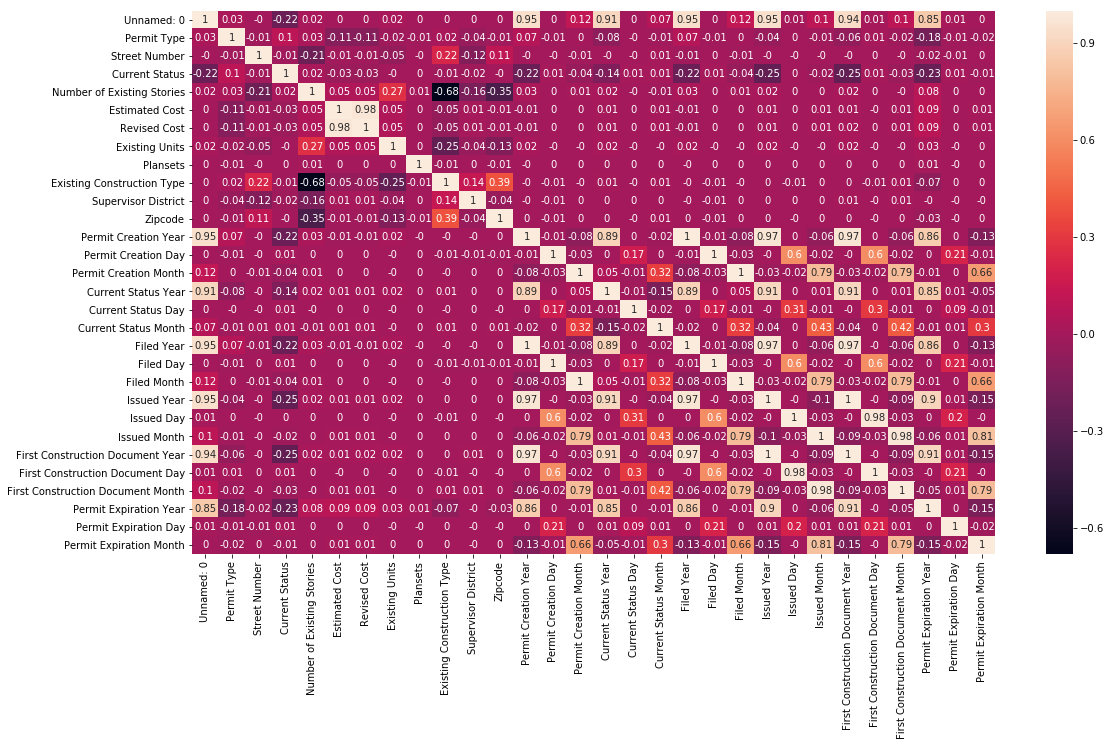

In [20]:
plt.subplots(figsize =(9, 8))
correlation_matrix = sf_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

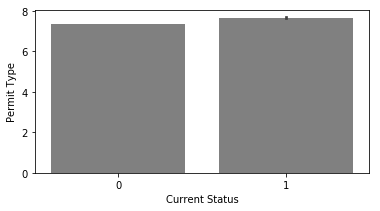

In [16]:
from sklearn import metrics
fig= plt.figure(figsize=(6,3))
sns.barplot('Current Status', 'Permit Type', data=sf_df, color="grey")


## Other correlations 

In [ ]:
fig= plt.figure(figsize=(6,3))
sns.barplot('Revised Cost', 'Estimated Cost', data=sf_df, color="grey")

Text(0, 0.5, 'Revised Cost')

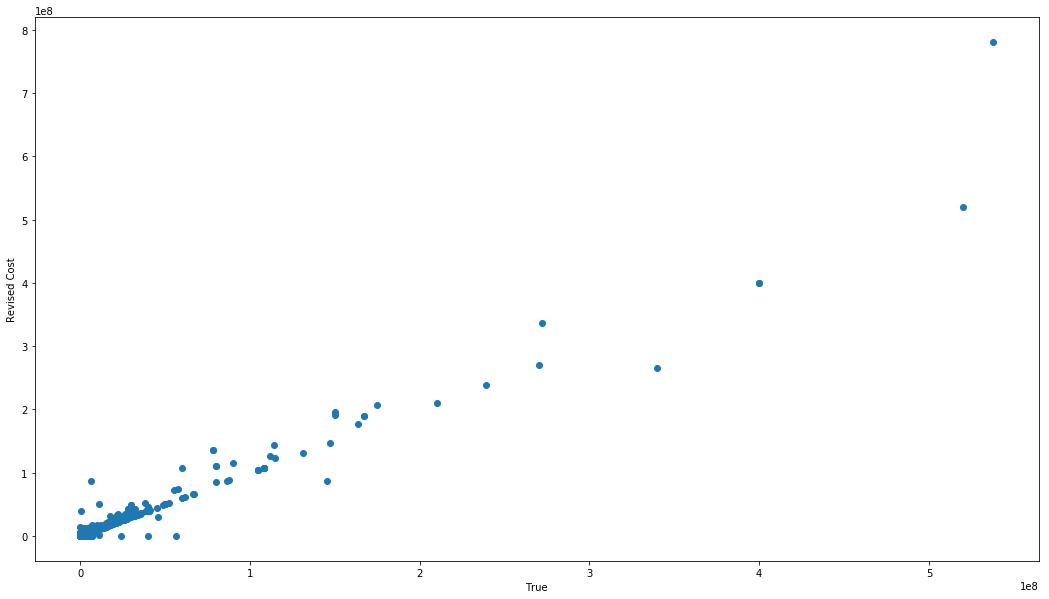

In [19]:
plt.scatter(sf_df['Estimated Cost'], sf_df['Revised Cost'])
plt.xlabel(sf_df['Estimated Cost'].any())
plt.ylabel('Revised Cost')

## D SF Challanges 
We had several challenges which we came across in task A to C. Here are some of them: 
- Which data is definetly necessary for our examination of the data. That is why in the beginning it is quit hard to say which columns should be kept and which can be kicked out. 
- In the beginning, due to changing 'Current status' to an binary value, the column was converted to the data type object. Afterwards it did not dissapear in the correlation matrix. After converting it to an int value the problem was fixed.
- Predicting 'Current status' did not seem to be very obvious and logic. 